<h1>Evaluation</h1>
<h2>Notes</h2>

Evaluate Queries based on Class/Distances

Different metrics
1) Truth Table -> How many of class c are returned given query size s. Incooperate distance measure as confidence metric. 
2) Mean Average Precision
3) Last Rank -> Last True Positive
4) ROC-Curve ANN system vs custom system (compare different distance metrics) - AUROC - invariant to query size
5) Confusion Matrix of Class Search -> weighed by inverse distance

Ideas: Measure inter-class distance according to our metric



In [5]:
import pandas as pd
from matplotlib import figure
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from tqdm import tqdm

In [22]:
#Load Distance Metrics
distances = np.load("./evaluation_data/custom_distances.npz")["dist"]
distances_ann = np.load("./evaluation_data/ann_distances.npz")["dist"]
df = pd.read_csv("./data/normCorrMetadata.csv")
distances+=np.abs(np.min(distances))
distances_ann+=np.abs(np.min(distances_ann))

#Define filepaths
average_distances_ann_fp = "./evaluation_data/average_distances_ann.csv"
average_distances_custom_fp = "./evaluation_data/average_distances_custom.csv"
normalized_distances_fp = "./evaluation_data/normalized_distances.npy"

truthtable_k_fp = "./evaluation_data/truthtable.csv"
truthtable_r_fp = "./evaluation_data/truthtable_r.csv"

In [13]:

# Step 1: Get the unique classes
unique_classes = df['Class'].unique()

# Step 2: Create a DataFrame to store the average distances between each class pair

def get_average_classwise_distances(distances,limit):
    average_distances = pd.DataFrame(index=unique_classes, columns=unique_classes)

    i=0
    # Step 3: Calculate the average distance for each class pair

    for class1 in tqdm(unique_classes, desc=f"Processing Class Pairs"):
        print(class1)
        for class2 in unique_classes:
            
            # Get the indices of objects in each class
            indices_class1 = np.array(df[df['Class'] == class1].index)
            indices_class2 = np.array(df[df['Class'] == class2].index)
            
            # Extract distances between objects in class1 and class2
            ixgrid = np.ix_(indices_class1, indices_class2)
            mean_distance = np.mean(distances[ixgrid])
            # Store the mean distance in the matrix
            average_distances.loc[class1, class2] = mean_distance
            i+=1
            if(limit!=None and i>limit):
                return average_distances.astype(float)

    # Step 4: Convert the DataFrame to float (in case of NaNs) for plotting
    average_distances = average_distances.astype(float)
    return average_distances

#average_distances_custom = get_average_classwise_distances(distances,limit=None)
#average_distances_custom.to_csv(average_distances_custom_fp)


#average_distances_ann = get_average_classwise_distances(distances_ann,limit=None)
#average_distances_ann.to_csv(average_distances_ann_fp)

average_distances_custom = pd.read_csv(average_distances_custom_fp)
average_distances_ann = pd.read_csv(average_distances_ann_fp)

In [14]:
def normalize_distances(distances,limit=None):
    #Normalize distances by number of class members
    norm = np.zeros(distances.shape)
    print(distances.shape)
    normvec = np.zeros(distances.shape[0])
    for i in range(0,len(distances)):
        cls = df.iloc[i]["Class"]
        clscount = df["Class"].value_counts()[cls]
        normvec[i]=1/clscount
    
    for i in range(0,len(distances)):
        norm[i]=distances[i]*normvec
        if(limit!=None and i>limit):
            break
    np.save(file="normalized_distances",arr=norm)
    return norm


def get_item_probabilities(distances,limit):
    item_prob = pd.DataFrame(index=df.index, columns=unique_classes)
    
    for idx,item in df.iterrows():
        return
    for class1 in tqdm(unique_classes, desc=f"Processing Class Pairs"):
        print(class1)
        for class2 in unique_classes:
            
            # Get the indices of objects in each class
            indices_class1 = np.array(df[df['Class'] == class1].index)
            indices_class2 = np.array(df[df['Class'] == class2].index)
            
            # Extract distances between objects in class1 and class2
            ixgrid = np.ix_(indices_class1, indices_class2)
            mean_distance = np.mean(distances[ixgrid])
            # Store the mean distance in the matrix
            average_distances.loc[class1, class2] = mean_distance
            i+=1
            if(limit!=None and i>limit):
                return average_distances.astype(float)

    # Step 4: Convert the DataFrame to float (in case of NaNs) for plotting
    average_distances = average_distances.astype(float)
    return average_distances

print(normalize_distances(distances,limit=None))

(2419, 2419)
[[0.         0.37907363 1.46238314 ... 1.25548458 1.20239813 0.95708179]
 [0.37907363 0.         1.40485596 ... 1.28798675 1.22235177 0.98872318]
 [1.46238314 1.40485596 0.         ... 0.94173944 0.77317627 0.99895945]
 ...
 [1.67397944 1.71731566 1.25565258 ... 0.         0.32409982 0.43641481]
 [1.6031975  1.62980236 1.03090169 ... 0.32409982 0.         0.41831146]
 [1.27610905 1.31829757 1.33194593 ... 0.43641481 0.41831146 0.        ]]


In [15]:
normalized_distances = np.array(np.load(normalized_distances_fp))
print(normalized_distances)

[[0.         0.37907363 1.46238314 ... 1.25548458 1.20239813 0.95708179]
 [0.37907363 0.         1.40485596 ... 1.28798675 1.22235177 0.98872318]
 [1.46238314 1.40485596 0.         ... 0.94173944 0.77317627 0.99895945]
 ...
 [1.67397944 1.71731566 1.25565258 ... 0.         0.32409982 0.43641481]
 [1.6031975  1.62980236 1.03090169 ... 0.32409982 0.         0.41831146]
 [1.27610905 1.31829757 1.33194593 ... 0.43641481 0.41831146 0.        ]]


In [16]:
average_distances_custom=pd.read_csv(average_distances_custom_fp,index_col=0)
average_distances_ann=pd.read_csv(average_distances_ann_fp,index_col=0)

#average_distances_custom.set_index('Unnamed: 0', inplace=True)

print(average_distances_custom.head())

                 AircraftBuoyant  Apartment  AquaticAnimal        Bed  \
AircraftBuoyant        14.850323  18.269275      18.618174  22.119757   
Apartment              18.269275  15.338052      21.827793  17.973699   
AquaticAnimal          18.618174  21.827793      12.539274  26.412191   
Bed                    22.119757  17.973699      26.412191  13.451247   
Bicycle                16.529478  17.774094      14.341236  20.575564   

                   Bicycle    Biplane       Bird    Bookset     Bottle  \
AircraftBuoyant  16.529478  16.514319  17.381938  21.851599  15.394071   
Apartment        17.774094  18.272874  19.841000  18.598082  18.547400   
AquaticAnimal    14.341236  14.220156  13.798406  27.461387  16.297523   
Bed              20.575564  22.309936  24.298829  22.373874  22.443040   
Bicycle           6.937374  10.102557  12.221365  23.091577  15.051289   

                 BuildingNonResidential  ...      Sword       Tool      Train  \
AircraftBuoyant               19.03

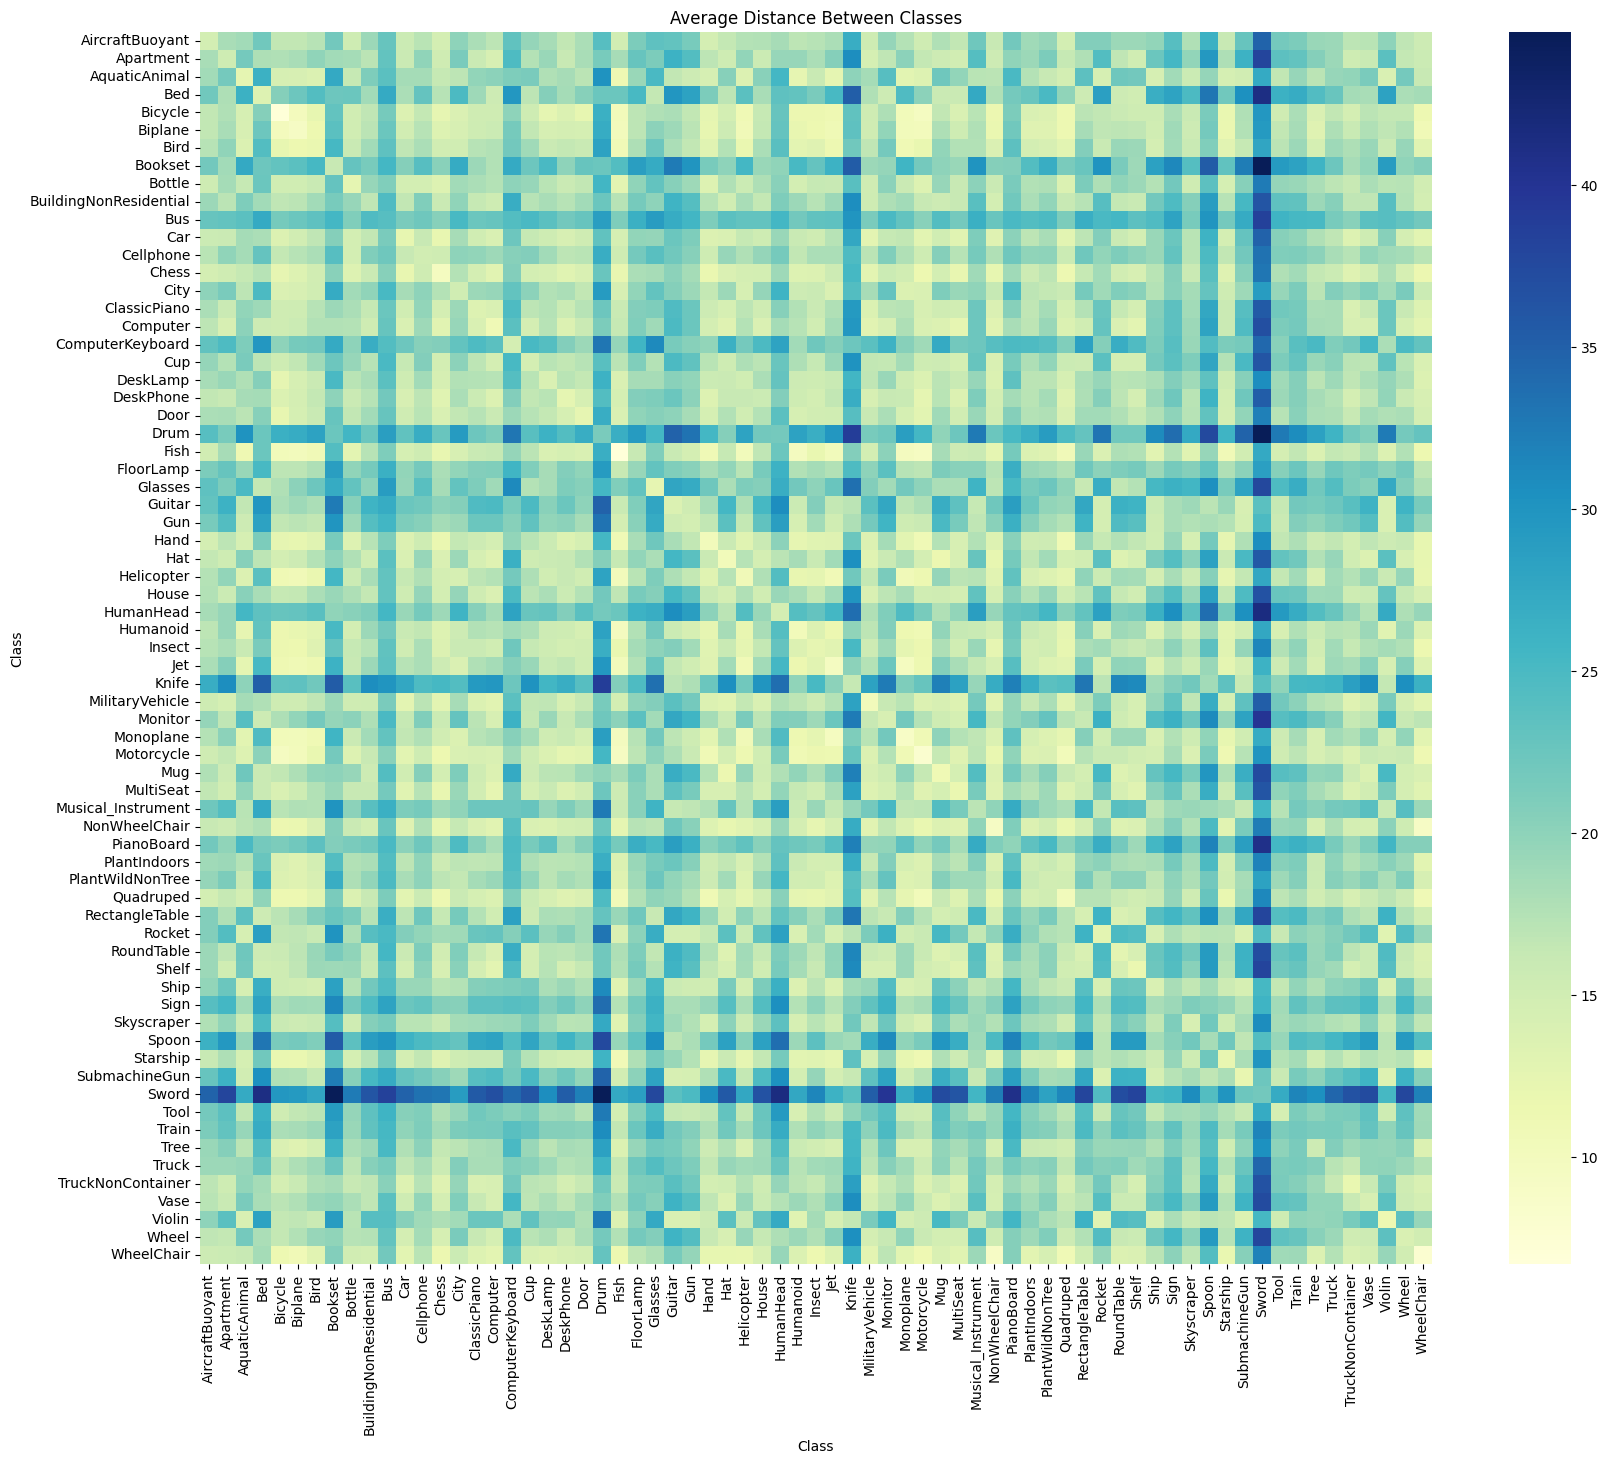

In [17]:

# Step 5: Plot the confusion matrix for average distances
plt.figure(figsize=(20, 16))
sns.heatmap(average_distances_custom, square=True,annot=False, cmap="YlGnBu", fmt=".2f",cbar_kws={'format': '%.0f'})
plt.title("Average Distance Between Classes")
plt.xlabel("Class")
plt.ylabel("Class")
plt.show()

In [18]:
#Display closest average class
count = 0
for idx,row in average_distances_custom.iterrows():
    rowmin = np.argmin(row)
    if(idx!=average_distances_custom.columns[rowmin]):
        print(idx,average_distances_custom.columns[rowmin],row[rowmin])
    else:
         count+=1
print(count)
    

AircraftBuoyant Hand 14.603624286697228
Apartment Computer 14.16547144141886
AquaticAnimal Fish 11.217104032137817
Bird Fish 10.836526852912392
BuildingNonResidential NonWheelChair 14.785401745490296
Bus TruckNonContainer 20.31277503119837
Car Chess 12.17351167297457
Cellphone Bottle 14.807590973869452
City Monoplane 13.703845616803124
ClassicPiano WheelChair 13.39325639545172
Cup NonWheelChair 14.045837961861691
DeskLamp Bicycle 12.505595396568818
Door Bicycle 12.247368526470796
Drum Mug 19.893549006687763
FloorLamp Fish 16.17703433913596
Gun Violin 14.091969170605758
Helicopter Fish 10.300784642917192
House Computer 13.899054005660018
Humanoid Fish 9.844777990813524
Insect Biplane 11.446786603863654
Knife SubmachineGun 16.177228838843746
Musical_Instrument Fish 15.889921153085591
NonWheelChair WheelChair 9.152379406689397
PianoBoard Computer 18.138656370284284
PlantIndoors WheelChair 12.831122430934512
PlantWildNonTree Biplane 13.229527035274147
RectangleTable RoundTable 14.077100683

['PlantIndoors', 'HumanHead', 'Chess', 'Sword', 'Biplane', 'Hand', 'Quadruped', 'Tool', 'Door', 'Jet']


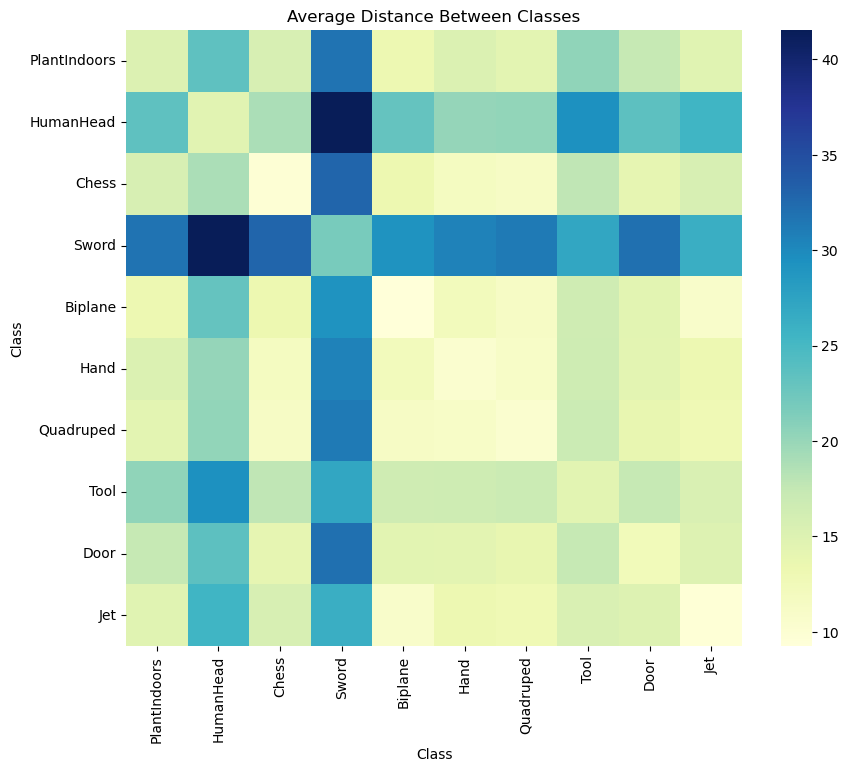

In [43]:
# Step 5: Plot the confusion matrix for average distances
plt.figure(figsize=(10, 8))

selected_classes = ["PlantIndoors","HumanHead","Chess","Sword","Biplane","Hand","Quadruped","Tool","Door","Jet"]  # replace with the actual class names you want to include

print(selected_classes)
# Step 2: Create a DataFrame to store the average distances between each selected class pair
subset_df = average_distances_custom.loc[selected_classes, selected_classes]
sns.heatmap(subset_df, square=True,annot=False, cmap="YlGnBu", fmt=".2f",cbar_kws={'format': '%.0f'})
plt.title("Average Distance Between Classes")
plt.xlabel("Class")
plt.ylabel("Class")
plt.show()

['Fish', 'Bird', 'FloorLamp', 'Helicopter', 'Humanoid', 'Musical_Instrument', 'Ship', 'Skyscraper', 'Train', 'AquaticAnimal']


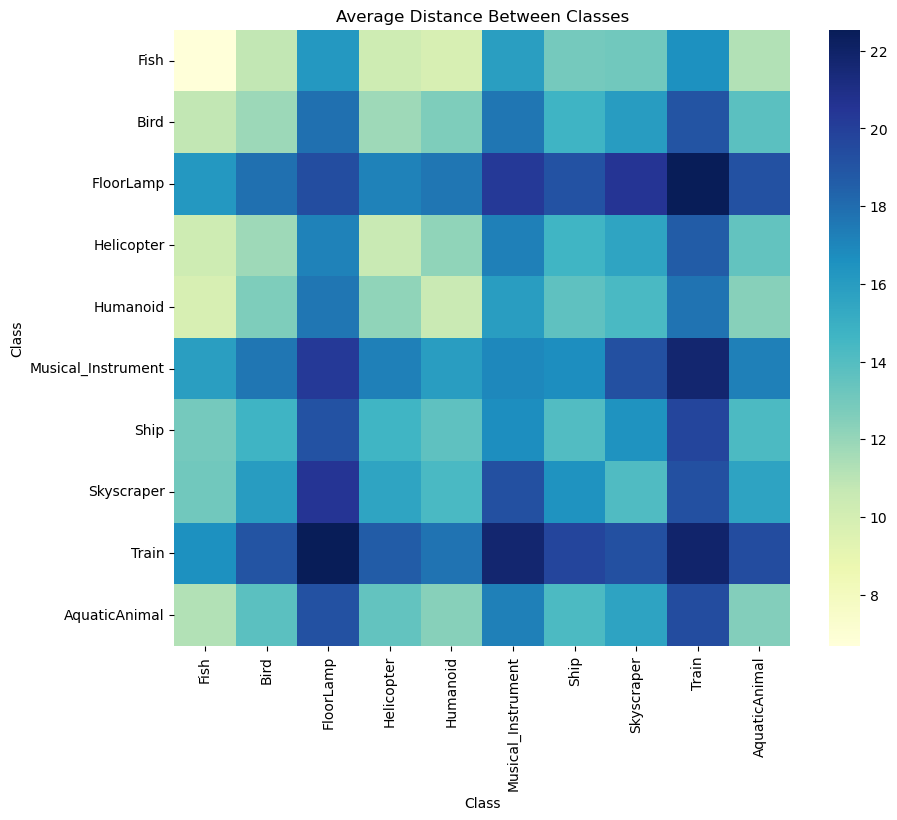

In [44]:
# Step 5: Plot the confusion matrix for average distances
plt.figure(figsize=(10, 8))

selected_classes = ["Fish","Bird","FloorLamp","Helicopter","Humanoid","Musical_Instrument","Ship","Skyscraper","Train","AquaticAnimal"]  # replace with the actual class names you want to include

print(selected_classes)
# Step 2: Create a DataFrame to store the average distances between each selected class pair
subset_df = average_distances_custom.loc[selected_classes, selected_classes]
sns.heatmap(subset_df, square=True,annot=False, cmap="YlGnBu", fmt=".2f",cbar_kws={'format': '%.0f'})
plt.title("Average Distance Between Classes")
plt.xlabel("Class")
plt.ylabel("Class")
plt.show()

<H1>ROC Curve and AUC Measure</H1>

In [19]:
from sklearn import metrics
df = pd.read_csv("mesh_features.csv")

In [15]:
def get_item_probabilities(distances,limit):
    unique_classes = df['class'].unique()
    i = 0
    item_prob = pd.DataFrame(index=df.index, columns=unique_classes)
    hits = np.zeros(distances.shape)
    for class1 in tqdm(unique_classes, desc=f"Processing Class Pairs"):
        class_indices = np.array(df[df["class"]==class1].index)
        rows, cols = np.ix_(class_indices, class_indices)
        hits[rows, cols] = 1
        i+=1
        if(limit!=None and i>limit):
            return hits

    # Step 4: Convert the DataFrame to float (in case of NaNs) for plotting
    return hits
y_true = get_item_probabilities(distances,limit=None)


Processing Class Pairs:   0%|          | 0/69 [00:00<?, ?it/s]

Processing Class Pairs: 100%|██████████| 69/69 [00:00<00:00, 385.49it/s]


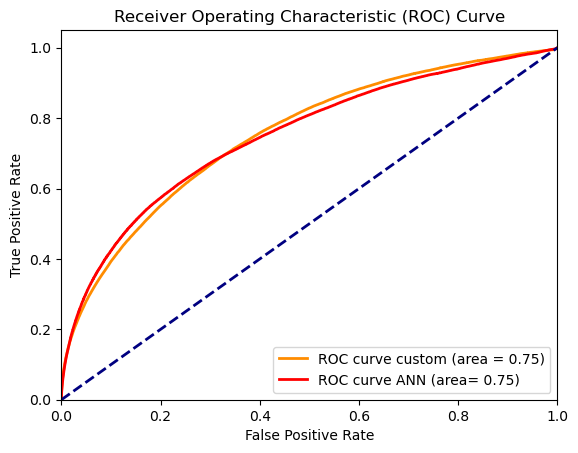

In [53]:
distances_ann_flat = distances_ann[np.triu_indices_from(distances_ann, k=1)]

distances_flat = distances[np.triu_indices_from(distances, k=1)]
hits_flat = y_true[np.triu_indices_from(y_true, k=1)]


fpr, tpr, thresholds = metrics.roc_curve(hits_flat, -distances_flat)  # Negative distances for similarity
roc_auc = metrics.auc(fpr, tpr)

fpr_ann, tpr_ann, thresholds_ann = metrics.roc_curve(hits_flat, -distances_ann_flat)  # Negative distances for similarity
roc_auc_ann = metrics.auc(fpr_ann, tpr_ann)


# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve custom (area = {roc_auc:.2f})')
plt.plot(fpr_ann, tpr_ann, color='red', lw=2, label=f'ROC curve ANN (area= {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [20]:
df = pd.read_csv("mesh_features.csv")

In [21]:
def get_k_res(distances,hits,limit=None,k=12):
    i=0
    truthTable = pd.DataFrame(index=list(range(0,len(distances))),columns=["TP","TN","FP","FN","Class"])
    for i in range(0,len(distances)): 
        idx = np.argpartition(distances[i], k)[0:k]
        thits = hits[i][idx]
        #print(idx,thits)

        TP = max (0, np.sum(thits)-1)
        FP = len(thits)-TP
        FN = np.sum(hits[i])-TP
        TN = len(hits[i])-FN-FP-TP
        cls = df.iloc[i]["class"]
        #print(TP,FP,TN,FN)
        dictionary = {"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Class":cls}
        truthTable.iloc[i] = pd.Series(dictionary)
        i+=1
        if(limit!=None and i>limit):
            break
    truthTable.to_csv(truthtable_k_fp)
    return truthTable

def get_r_res(distances,hits,limit=None,r=1):
    i=0
    nums= []
    truthTable = pd.DataFrame(index=list(range(0,len(distances))),columns=["TP","TN","FP","FN","Class"])
    for i in range(0,len(distances)): 
        filter_arr = distances[i] < r
        #print(filter_arr)
        thits = hits[i][filter_arr]
        nums.append(len(thits))

        TP = max (0, np.sum(thits)-1)
        FP = len(thits)-TP
        FN = np.sum(hits[i])-TP
        TN = len(hits[i])-FN-FP-TP
        cls = df.iloc[i]["class"]
        #print(TP,FP,TN,FN)
        dictionary = {"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Class":cls}
        truthTable.iloc[i] = pd.Series(dictionary)
        i+=1
        if(limit!=None and i>limit):
            break
    print(nums)
    print(f"average number of query results: {np.mean(nums)} std: {np.std(nums)}")
    truthTable.to_csv(truthtable_r_fp)
    return truthTable, nums


def calculate_metrics(df):
        
    # Calculate metrics
    df['Accuracy'] = (df['TP'] + df['TN']) / (
        df['TP'] + df['FP'] + df['TN'] + df['FN']
    )
    df['Precision'] = df['TP'] / (df['TP'] + df['FP'])
    df['Recall'] = df['TP'] / (df['TP'] + df['FN'])
    df['F1'] = 2 * (df['Precision'] * df['Recall']) / (
        df['Precision'] + df['Recall']
    )
    return df



In [55]:
truthTable_k12 = get_k_res(distances,y_true,limit=None,k=12)
truthTable_k12 = calculate_metrics(truthTable_k12)     

truthTable_k12_ann = get_k_res(distances_ann,y_true,limit=None,k=12)
truthTable_k12_ann = calculate_metrics(truthTable_k12_ann)

truthTable_k6 = get_k_res(distances,y_true,limit=None,k=6)
truthTable_k6 = calculate_metrics(truthTable_k6)

truthTable_k6_ann = get_k_res(distances_ann,y_true,limit=None,k=6)
truthTable_k6_ann = calculate_metrics(truthTable_k6_ann)

truthTable_k2 = get_k_res(distances,y_true,limit=None,k=2)
truthTable_k2 = calculate_metrics(truthTable_k2)

truthTable_k2_ann = get_k_res(distances_ann,y_true,limit=None,k=2)
truthTable_k2_ann = calculate_metrics(truthTable_k2_ann)

print(truthTable_k12.head())

    TP      TN    FP    FN            Class  Accuracy Precision    Recall  \
0  1.0  2393.0  11.0  14.0  AircraftBuoyant  0.989665  0.083333  0.066667   
1  1.0  2393.0  11.0  14.0  AircraftBuoyant  0.989665  0.083333  0.066667   
2    0  2392.0    12  15.0  AircraftBuoyant  0.988838       0.0       0.0   
3    0  2392.0    12  15.0  AircraftBuoyant  0.988838       0.0       0.0   
4    0  2392.0    12  15.0  AircraftBuoyant  0.988838       0.0       0.0   

         F1  
0  0.074074  
1  0.074074  
2       NaN  
3       NaN  
4       NaN  


In [56]:
# Plot using seaborn
truthTable_k12['Model'] = 'Custom - k=12'
truthTable_k12_ann['Model'] = 'Ann - k=12'
truthTable_k6['Model'] = 'Custom - k=6'
truthTable_k6_ann['Model'] = 'Ann - k=6'
truthTable_k2['Model'] = 'Custom - k=2'
truthTable_k2_ann['Model'] = 'Ann - k=2'
# Concatenate the tables
combined_df = pd.concat([truthTable_k12, truthTable_k12_ann,truthTable_k6,truthTable_k6_ann,truthTable_k2,truthTable_k2_ann])

print(combined_df.head())

    TP      TN    FP    FN            Class  Accuracy Precision    Recall  \
0  1.0  2393.0  11.0  14.0  AircraftBuoyant  0.989665  0.083333  0.066667   
1  1.0  2393.0  11.0  14.0  AircraftBuoyant  0.989665  0.083333  0.066667   
2    0  2392.0    12  15.0  AircraftBuoyant  0.988838       0.0       0.0   
3    0  2392.0    12  15.0  AircraftBuoyant  0.988838       0.0       0.0   
4    0  2392.0    12  15.0  AircraftBuoyant  0.988838       0.0       0.0   

         F1          Model  
0  0.074074  Custom - k=12  
1  0.074074  Custom - k=12  
2       NaN  Custom - k=12  
3       NaN  Custom - k=12  
4       NaN  Custom - k=12  


In [61]:
def plot_score(df, measure,subset=None):
    plt.figure(figsize=(10, 6))
    if(subset!=None):
        df = df[df["Class"].isin(subset)]
    df_no_nan = df[df[measure].notna()].copy()

    # Compute the average score per class and sort by this average
    class_order = df_no_nan.groupby('Class')[measure].mean().sort_values().index

    # Sort the DataFrame by the class order for plotting
    df_no_nan['Class'] = pd.Categorical(df_no_nan['Class'], categories=class_order, ordered=True)

    sns.barplot(data=df_no_nan, x='Class', y=measure, hue='Model', palette=["lightsteelblue","orangered","cornflowerblue","darkorange","royalblue","gold"])

    plt.title(f'{measure} by Class')
    plt.ylim(0, 1)  # Assuming metrics are between 0 and 1
    plt.ylabel('Score')
    plt.xticks(rotation=90)  # Rotate class labels for better readability

    plt.legend(title='Distance Measure')
    plt.show()


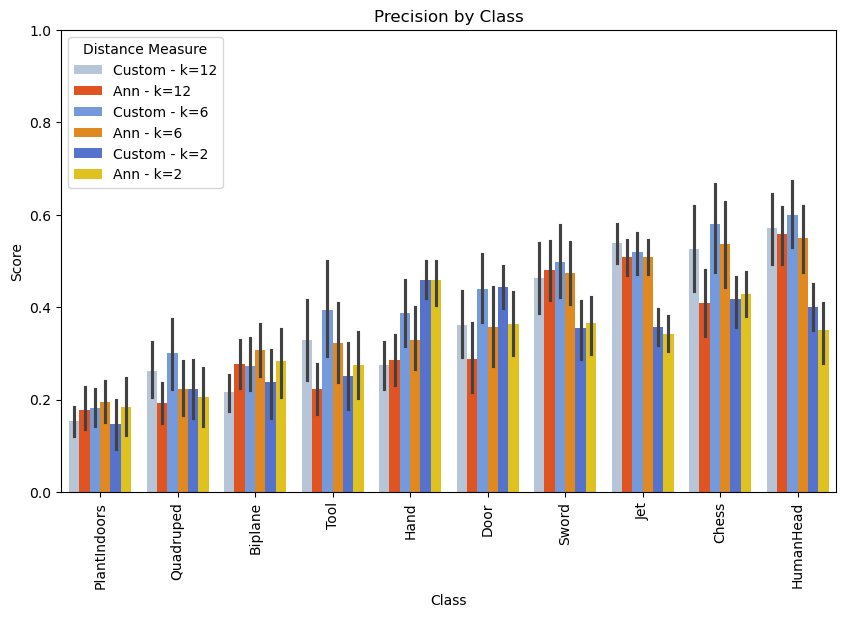

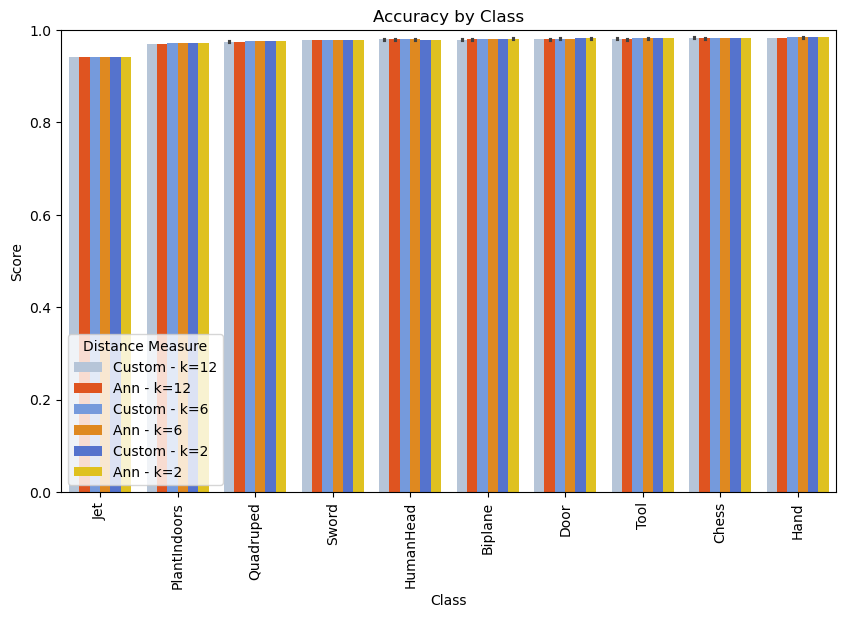

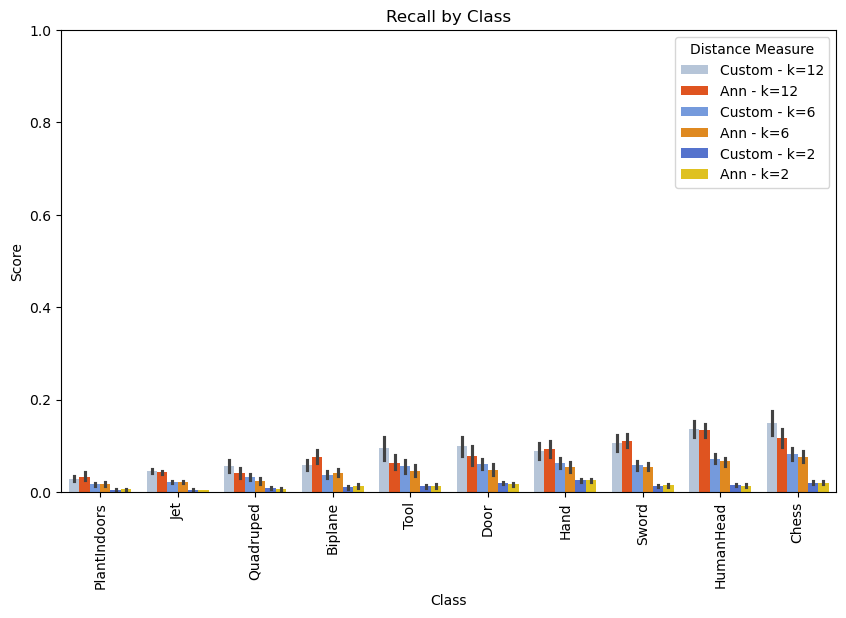

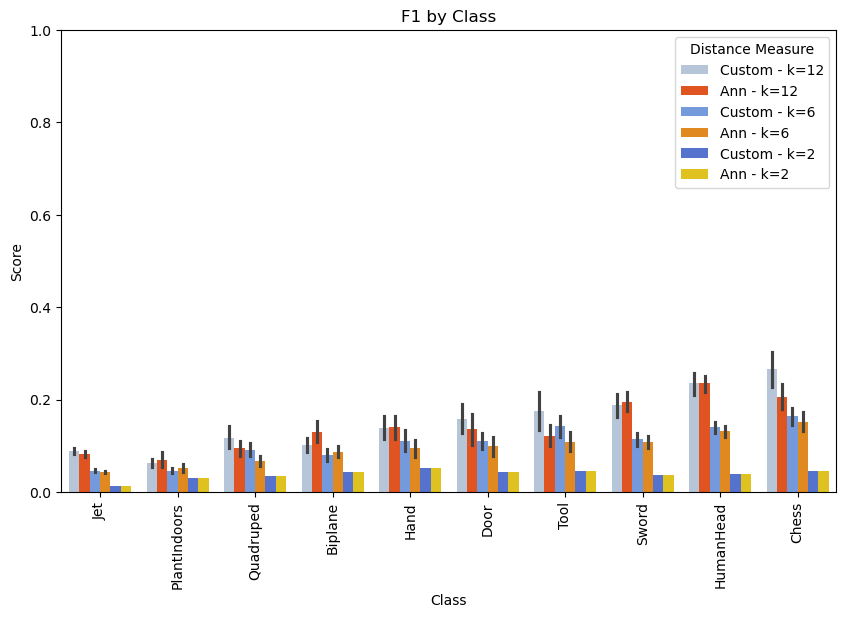

In [62]:
plot_score(combined_df,"Precision", subset=["PlantIndoors","HumanHead","Chess","Sword","Biplane","Hand","Quadruped","Tool","Door","Jet"]  # replace with the actual class names you want to include
)
plot_score(combined_df,"Accuracy", subset=["PlantIndoors","HumanHead","Chess","Sword","Biplane","Hand","Quadruped","Tool","Door","Jet"]  # replace with the actual class names you want to include
)
plot_score(combined_df,"Recall", subset=["PlantIndoors","HumanHead","Chess","Sword","Biplane","Hand","Quadruped","Tool","Door","Jet"]  # replace with the actual class names you want to include
)
plot_score(combined_df,"F1", subset=["PlantIndoors","HumanHead","Chess","Sword","Biplane","Hand","Quadruped","Tool","Door","Jet"]  # replace with the actual class names you want to include
)


In [ ]:
#Get Global Measures
for i in ["Accuracy","Precision","Recall","F1"]:
    r1 = np.around(truthTable_k12[i].mean(),decimals=4)
    r2 = np.around(truthTable_k12_ann[i].mean(),decimals=4)
    r3 = np.around(truthTable_k6[i].mean(),decimals=4)
    r4 = np.around(truthTable_k6_ann[i].mean(),decimals=4)
    r5 = np.around(truthTable_k2[i].mean(),decimals=4)
    r6 = np.around(truthTable_k2_ann[i].mean(),decimals=4)
    print(f"{i} - Custom-12:  {r1}; Custom-6: {r3}; Custom-2 {r5}; ANN-12: {r2},  ANN-6:{r4}, , ANN-2 {r6}")


Accuracy - Custom-12:  0.976; Custom-6: 0.9774; Custom-2 0.978; ANN-12: 0.9758,  ANN-6:0.9773, , ANN-2 0.978
Precision - Custom-12:  0.2537; Custom-6: 0.2827; Custom-2 0.2329; ANN-12: 0.232,  ANN-6:0.2561, , ANN-2 0.2164
Recall - Custom-12:  0.0678; Custom-6: 0.0393; Custom-2 0.0114; ANN-12: 0.0624,  ANN-6:0.0358, , ANN-2 0.0107
F1 - Custom-12:  0.1302; Custom-6: 0.0977; Custom-2 0.0461; ANN-12: 0.1217,  ANN-6:0.0908, , ANN-2 0.0463


<H1>Evaluate Radius based method</H1>

In [5]:
flattened_values = distances.flatten()
flattened_values+=np.abs(np.min(flattened_values))

#flattened_values = (flattened_values-np.min(flattened_values))/(np.max(flattened_values)-np.min(flattened_values))
print(np.max(flattened_values))

119.32213672151435


In [6]:
flattened_values2 = distances_ann.flatten()
flattened_values2+=np.abs(np.min(flattened_values))
#flattened_values2 = (flattened_values2-np.min(flattened_values2))/(np.max(flattened_values2)-np.min(flattened_values2))

print(np.max(flattened_values2))

62.277225


In [7]:
quantile = np.quantile(flattened_values,0.95)
print(quantile)

34.233659299666286


In [16]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first histogram
sns.histplot(np.clip(flattened_values,0,quantile), bins=20, kde=True, color='darkorange', label='Custom', alpha=0.6)

# Plot the second histogram
sns.histplot(np.clip(flattened_values2,0,quantile), bins=20, kde=True, color='red', label='Ann', alpha=0.6)

# Add labels and title
plt.title('Comparing distances between histograms')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(title='Dataset')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

In [25]:
quantile12_c = np.quantile(flattened_values,12/len(distances))
quantile6_c = np.quantile(flattened_values,6/len(distances))
quantile2_c = np.quantile(flattened_values,2/len(distances))

quantile12_ann = np.quantile(flattened_values2,12/len(distances))
quantile6_ann = np.quantile(flattened_values2,6/len(distances))
quantile2_ann = np.quantile(flattened_values2,2/len(distances))

quantile50_ann = np.quantile(flattened_values2,0.50)
quantile50_c = np.quantile(flattened_values,0.5)


print(quantile12_c)

5.907122288921585


In [73]:
print(np.quantile(flattened_values,12/len(distances)))
print(np.quantile(flattened_values2,12/len(distances)))


5.907122288921585
0.30318447947502136


In [30]:
truthTable_r12, avgr12 = get_r_res(distances,y_true,limit=None,r=quantile12_c)
truthTable_r12 = calculate_metrics(truthTable_r12)     

truthTable_r12_ann, avga12 = get_r_res(distances_ann,y_true,limit=None,r=quantile12_ann)
truthTable_r12_ann = calculate_metrics(truthTable_r12_ann)

truthTable_r6,_ = get_r_res(distances,y_true,limit=None,r=quantile6_c)
truthTable_r6 = calculate_metrics(truthTable_r6)

truthTable_r6_ann,_ = get_r_res(distances_ann,y_true,limit=None,r=quantile6_ann)
truthTable_r6_ann = calculate_metrics(truthTable_r6_ann)

truthTable_r2,_ = get_r_res(distances,y_true,limit=None,r=quantile2_c)
truthTable_r2 = calculate_metrics(truthTable_r2)

truthTable_r2_ann,_ = get_r_res(distances_ann,y_true,limit=None,r=quantile2_ann)
truthTable_r2_ann = calculate_metrics(truthTable_r2_ann)


truthTable_r50,_ = get_r_res(distances,y_true,limit=None,r=quantile50_c)
truthTable_r50 = calculate_metrics(truthTable_r50)

truthTable_r50_ann,_ = get_r_res(distances_ann,y_true,limit=None,r=quantile50_ann)
truthTable_r50_ann = calculate_metrics(truthTable_r50_ann)

[2, 2, 1, 7, 1, 2, 1, 2, 3, 13, 12, 13, 6, 1, 11, 1, 1, 1, 2, 1, 3, 2, 2, 1, 2, 1, 2, 1, 1, 2, 11, 2, 2, 1, 2, 1, 3, 2, 3, 4, 7, 1, 4, 5, 1, 31, 14, 17, 1, 32, 123, 3, 1, 5, 15, 36, 17, 49, 30, 21, 30, 29, 6, 49, 10, 41, 14, 3, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 6, 1, 3, 1, 5, 1, 1, 1, 5, 1, 2, 2, 1, 1, 1, 4, 7, 9, 12, 7, 34, 15, 6, 7, 31, 29, 21, 4, 19, 8, 21, 34, 3, 41, 15, 2, 26, 8, 2, 11, 32, 8, 12, 20, 3, 77, 1, 32, 3, 13, 5, 73, 5, 19, 12, 26, 49, 10, 54, 9, 7, 6, 52, 9, 30, 41, 1, 38, 85, 38, 47, 41, 85, 75, 69, 47, 5, 77, 25, 15, 63, 45, 11, 1, 78, 48, 33, 21, 4, 78, 27, 4, 1, 5, 20, 13, 14, 24, 28, 19, 27, 56, 28, 43, 20, 3, 4, 33, 30, 14, 18, 39, 34, 3, 4, 41, 4, 49, 23, 26, 1, 1, 40, 5, 1, 18, 20, 7, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 11, 1, 1, 7, 7, 6, 7, 1, 1, 1, 1, 5, 4, 1, 1, 1, 2, 14, 9, 8, 7, 1, 9, 3, 1, 1, 6, 2, 2, 1, 8, 1, 1, 3, 12, 18, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 90, 1, 1, 1, 1, 1, 1, 1, 1, 10, 19, 1, 1, 4, 15, 50, 1, 1

In [31]:
quantile1=np.quantile(avgr12,0.95)
quantile2=np.quantile(avga12,0.95)
print(quantile1,quantile2)

51.09999999999991 66.0


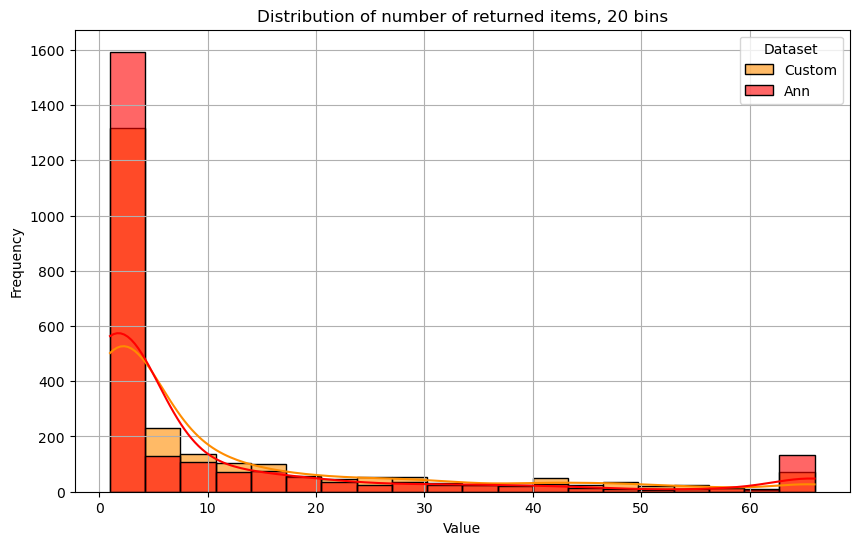

In [32]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first histogram
sns.histplot(np.clip(avgr12,0,quantile2), bins=20, kde=True, color='darkorange', label='Custom', alpha=0.6)

# Plot the second histogram
sns.histplot(np.clip(avga12,0,quantile2), bins=20, kde=True, color='red', label='Ann', alpha=0.6)

# Add labels and title
plt.title('Distribution of number of returned items, 20 bins')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(title='Dataset')
plt.grid(True)
plt.show()

In [82]:
for i in ["Accuracy","Precision","Recall","F1"]:
    r1 = np.around(truthTable_r12[i].mean(),decimals=4)
    r2 = np.around(truthTable_r12_ann[i].mean(),decimals=4)
    r3 = np.around(truthTable_r6[i].mean(),decimals=4)
    r4 = np.around(truthTable_r6_ann[i].mean(),decimals=4)
    r5 = np.around(truthTable_r2[i].mean(),decimals=4)
    r6 = np.around(truthTable_r2_ann[i].mean(),decimals=4)
    print(f"{i} - Custom-12:  {r1}; Custom-6: {r3}; Custom-2 {r5}; ANN-12: {r2},  ANN-6:{r4}, , ANN-2 {r6}")

Accuracy - Custom-12:  0.9765; Custom-6: 0.9778; Custom-2 0.9782; ANN-12: 0.9762,  ANN-6:0.9775, , ANN-2 0.9782
Precision - Custom-12:  0.2057; Custom-6: 0.1964; Custom-2 0.1457; ANN-12: 0.1603,  ANN-6:0.1576, , ANN-2 0.1266
Recall - Custom-12:  0.0539; Custom-6: 0.0324; Custom-2 0.0106; ANN-12: 0.0471,  ANN-6:0.028, , ANN-2 0.0099
F1 - Custom-12:  0.1371; Custom-6: 0.1168; Custom-2 0.0726; ANN-12: 0.1356,  ANN-6:0.1154, , ANN-2 0.0736
